In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.conv_learner import *

In [3]:
PATH = Path('../../data/cifar10/')

In [18]:
def process_file(name):
    cols = ['epoch', 'trn_loss', 'val_loss', 'metric']
    res = collections.defaultdict(list)
    with open(PATH/name,'r') as f:
        lines = f.readlines()
        for line in lines[2:]:
            items = line[:-1].split(' ')
            c = 0
            for item in items:
                if len(item) > 0:
                    if isfloat(item):
                        if isint(item): res[cols[c]].append(int(item))
                        else: res[cols[c]].append(float(item))
                        c += 1
    df = pd.DataFrame(res, columns=cols)
    return df

In [25]:
def plot_file(name):
    df = process_file(name)
    drops = []
    for i in range(len(df)):
        if df.iloc[i].isna().any(): drops.append(i)
    df.drop(drops, inplace=True)
    epochs = df['epoch'].values
    trn_loss = df['trn_loss'].values
    val_loss = df['val_loss'].values
    metric = df['metric'].values
    fig, axs = plt.subplots(1,2, figsize=(10,4))
    axs[0].plot(epochs, trn_loss, label='trn')
    axs[0].plot(epochs, val_loss, label='val')
    axs[0].legend(loc='upper right')
    axs[1].plot(epochs, metric)
    plt.tight_layout()

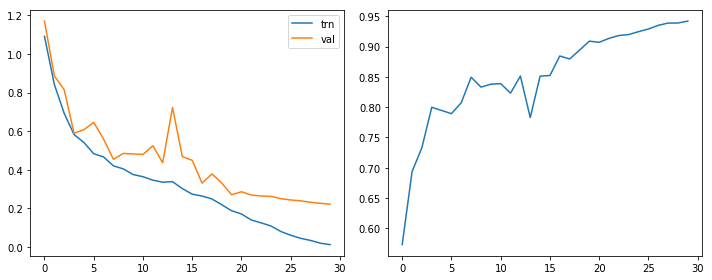

In [26]:
plot_file('cifar10.txt')

In [52]:
res = pickle.load(open(PATH/'cifar10.pkl','rb'))

The dictionary contains one key per
- param Tensor in the model (can be the weight or bias of a layer), those are named with pytorch param_names
- gradients of param Tensor in the model, those are named like the param with .grad added at the end
- module of the model, those are named the same way as in model.summary.

In [53]:
res.keys()

dict_keys(['features.0.weight', 'features.0.weight.grad', 'features.1.bn.weight', 'features.1.bn.weight.grad', 'features.1.bn.bias', 'features.1.bn.bias.grad', 'features.1.conv1.weight', 'features.1.conv1.weight.grad', 'features.1.conv2.0.weight', 'features.1.conv2.0.weight.grad', 'features.1.conv2.0.bias', 'features.1.conv2.0.bias.grad', 'features.1.conv2.2.weight', 'features.1.conv2.2.weight.grad', 'features.1.shortcut.weight', 'features.1.shortcut.weight.grad', 'features.2.bn.weight', 'features.2.bn.weight.grad', 'features.2.bn.bias', 'features.2.bn.bias.grad', 'features.2.conv1.weight', 'features.2.conv1.weight.grad', 'features.2.conv2.0.weight', 'features.2.conv2.0.weight.grad', 'features.2.conv2.0.bias', 'features.2.conv2.0.bias.grad', 'features.2.conv2.2.weight', 'features.2.conv2.2.weight.grad', 'features.3.bn.weight', 'features.3.bn.weight.grad', 'features.3.bn.bias', 'features.3.bn.bias.grad', 'features.3.conv1.weight', 'features.3.conv1.weight.grad', 'features.3.conv2.0.weig

In [74]:
from fastai.models.cifar10.wideresnet import wrn_22

In [75]:
m = wrn_22()

In [76]:
m

WideResNet(
  (features): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BasicBlock(
      (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(16, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (conv2): Sequential(
        (0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): ReLU(inplace)
        (2): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (shortcut): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
    )
    (2): BasicBlock(
      (bn): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (conv2): Sequential(
        (0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1):

Named parameters

In [80]:
[n[0] for n in m.named_parameters()]

['features.0.weight',
 'features.1.bn.weight',
 'features.1.bn.bias',
 'features.1.conv1.weight',
 'features.1.conv2.0.weight',
 'features.1.conv2.0.bias',
 'features.1.conv2.2.weight',
 'features.1.shortcut.weight',
 'features.2.bn.weight',
 'features.2.bn.bias',
 'features.2.conv1.weight',
 'features.2.conv2.0.weight',
 'features.2.conv2.0.bias',
 'features.2.conv2.2.weight',
 'features.3.bn.weight',
 'features.3.bn.bias',
 'features.3.conv1.weight',
 'features.3.conv2.0.weight',
 'features.3.conv2.0.bias',
 'features.3.conv2.2.weight',
 'features.4.bn.weight',
 'features.4.bn.bias',
 'features.4.conv1.weight',
 'features.4.conv2.0.weight',
 'features.4.conv2.0.bias',
 'features.4.conv2.2.weight',
 'features.4.shortcut.weight',
 'features.5.bn.weight',
 'features.5.bn.bias',
 'features.5.conv1.weight',
 'features.5.conv2.0.weight',
 'features.5.conv2.0.bias',
 'features.5.conv2.2.weight',
 'features.6.bn.weight',
 'features.6.bn.bias',
 'features.6.conv1.weight',
 'features.6.conv2.0

For each key, the dictionary contains three list of arrays: pos, neg, sgn. pos contains the percentiles of the positive values only, neg containts the percentiles of the negatives values and sgn gives two percentages of pos/neg values (zero excluded so if it doesn't add up to one, it's because the rest is nil).

Percentiles registered are [0.001, 0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.999]

In [54]:
res['features.0.weight']

defaultdict(list,
            {'neg': [array([-0.18504, -0.18503, -0.18497, -0.18491, -0.18471, -0.18436, -0.18358, -0.18312, -0.18296, -0.18284,
                     -0.18282]),
              array([-0.18474, -0.18473, -0.18468, -0.18462, -0.18443, -0.18412, -0.18361, -0.18331, -0.1832 , -0.18312,
                     -0.1831 ]),
              array([-0.18487, -0.18485, -0.18476, -0.18465, -0.18432, -0.18378, -0.18366, -0.18359, -0.18357, -0.18354,
                     -0.18352]),
              array([-0.18469, -0.18468, -0.18461, -0.18453, -0.18429, -0.18389, -0.18351, -0.18328, -0.1832 , -0.18314,
                     -0.18314]),
              array([-0.1841 , -0.1841 , -0.1841 , -0.1841 , -0.1841 , -0.18408, -0.1837 , -0.18348, -0.1834 , -0.18334,
                     -0.18334]),
              array([-0.18737, -0.1873 , -0.18702, -0.18666, -0.1856 , -0.18386, -0.18324, -0.18287, -0.18274, -0.18265,
                     -0.18264]),
              array([-0.1898 , -0.18973, -0.18942, 

In [55]:
def process_key(res, key, pct):
    idx = 0
    pcts = [0.001, 0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.999]
    while idx < len(pcts) and pcts[idx] != pct: idx +=1
    assert idx < len(pcts), "This pct value wasn't recorded"
    p_vals, n_vals, sgns = [], [], []
    for pos, neg, sgn in zip(res[key]['pos'], res[key]['neg'], res[key]['sgn']):
        p_vals.append(pos[idx])
        n_vals.append(neg[idx])
        sgns.append(sgn)
    return p_vals, n_vals, sgns

In [70]:
p_vals, n_vals, sgns = process_key(res, 'features.1.conv1.weight.grad', 0.5)

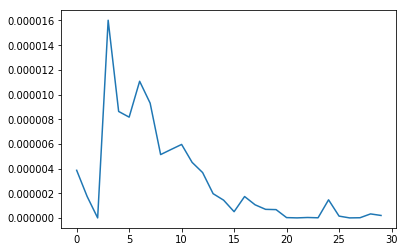

In [71]:
plt.plot(p_vals[8:])

In [73]:
len(sgns)

38

9 values from epoch 0 and 29 values after.

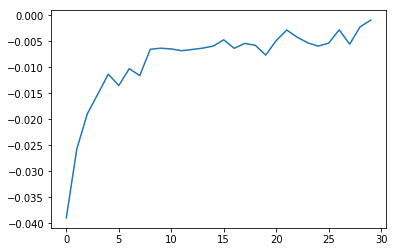

In [72]:
plt.plot(n_vals[8:])

In [59]:
sgns

[[0.5295138888888888, 0.4704861111111111],
 [0.5591001157407407, 0.44089988425925924],
 [0.5305989583333334, 0.4694010416666667],
 [0.4996383101851852, 0.5003616898148148],
 [0.48951099537037035, 0.5104890046296297],
 [0.4896556712962963, 0.5103443287037037],
 [0.5111400462962963, 0.4888599537037037],
 [0.5043402777777778, 0.4956597222222222],
 [0.5332754629629629, 0.46672453703703703],
 [0.48734085648148145, 0.5126591435185185],
 [0.5073784722222222, 0.4926215277777778],
 [0.4562355324074074, 0.4812644675925926],
 [0.47728587962962965, 0.46021412037037035],
 [0.44950810185185186, 0.48799189814814814],
 [0.4562355324074074, 0.4812644675925926],
 [0.4714988425925926, 0.4660011574074074],
 [0.49428530092592593, 0.44321469907407407],
 [0.45797164351851855, 0.47952835648148145],
 [0.44892939814814814, 0.48857060185185186],
 [0.4662181712962963, 0.4712818287037037],
 [0.49363425925925924, 0.44386574074074076],
 [0.4615885416666667, 0.4759114583333333],
 [0.4908130787037037, 0.43692129629629